# Importar librerías necesarias

In [1]:
import pandas as pd
import time
import numpy as np

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/david-T-M/Data/main/train.csv')

In [3]:
df_train

,Unnamed: 0,doc_id,Texto
0,1995,1883698,hyman roth personaje ficticio película padrino...
1,1992,1883688,freno regenerativo dispositivo permite reducir...
2,2488,1886956,symmorium género extinto tiburón estetacántido...
3,3931,1894710,pedro blanco ariza periodista español cadena s...
4,3476,1892350,universidad tecnológica manzanillo institución...
...,...,...,...
805,4283,1896658,kerlinglèssierck población comuna francesa reg...
806,755,1876630,fundación libro entidad civil fines lucro sede...
807,2656,1887851,auterive población comuna francesa ubicada reg...
808,3099,1890484,munilla conocida munilla hoz localidad situada...


# **Modelación de documentos de entrenamiento**


## 1.- Creacion de matriz para SVD :
Corpus de tamaño **N**, y vocabulario **v**

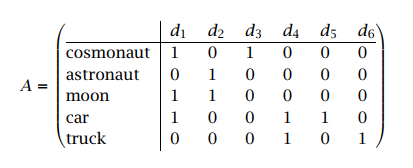

In [4]:
# with 40 texts = 40 articulos
nd=100
train = df_train.iloc[0:nd]

#train =df_train.copy()
list_tokens = [] # lista de palabras totales

big_string = ''
for index,string in train.iterrows():
    big_string += string['Texto']+ ' '
    string1 = string['Texto'].split(' ')
    list_tokens.append(string1)

In [5]:
len(list_tokens)

100

In [6]:
#### to evaluate the size of the sample (N tokens, vocabulary v)
string_list = big_string.split(' ')
N = len(string_list) #número de tokens

# Set is used to avoid repetition
set1 = set()
for word in string_list:
    if(word!=''):
      set1.add((word,string_list.count(word)))

ranking_words = pd.DataFrame(set1)
ranking_words.columns = ['word', 'count']
ranking_words = ranking_words.sort_values(['count'], ascending = False)
v = len(ranking_words)
print('Cuantas palabras ?' , N, '\nTamaño del vocabulario ?', v)
ranking_words.tail()

Cuantas palabras ? 20334 
Tamaño del vocabulario ? 8490


,word,count
3461,eliminaran,1
3459,places,1
3458,musical,1
3457,descubrir,1
4245,pabellón,1


In [7]:
ranking_words = ranking_words.assign(f_documentos=0)

In [8]:
M = pd.DataFrame(0.0, index=ranking_words['word'], columns=train['doc_id'])

In [9]:
columnas=M.columns

In [10]:
temp=M.copy()
temp1=M.copy()
for i in range((temp.shape[1])):
  texto=train.loc[i,'Texto'].split(' ')
  #print(texto)
#  print(texto,i)
  for index, documento in temp1.iterrows():
    #print(index,documento[i],texto.count(index))
    #print(i,index)
    M.at[index,columnas[i]]=texto.count(index)

In [11]:
M.to_pickle("M.pickle")

Calcular el TF-IDF de la matriz Z

In [12]:
ranking_words.set_index('word',inplace = True)

In [13]:
M

doc_id,1883698,1883688,1886956,1894710,1892350,1891869,1894679,1887686,1885932,1891788,...,1890357,1874856,1889492,1884647,1879246,1877599,1899206,1885451,1880301,1890943
word,,,,,,,,,,,,,,,,,,,,,
san,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
años,0.0,1.0,0.0,0.0,1.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
enlaces,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
parte,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
externos,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eliminaran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
places,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
musical,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
temp=M.copy()
for index,articulo in temp.iterrows():
  #print(len(articulo))
  conteo=0.0
  for i in range(len(articulo)):
    if(float(articulo[i])>0.0):
      conteo+=1
  ranking_words.at[index,'f_documentos']=conteo
ranking_words

,count,f_documentos
word,,
san,58,18
años,57,20
enlaces,56,53
parte,54,25
externos,53,53
...,...,...
eliminaran,1,1
places,1,1
musical,1,1


In [15]:
Mzero=M
Mzero

doc_id,1883698,1883688,1886956,1894710,1892350,1891869,1894679,1887686,1885932,1891788,...,1890357,1874856,1889492,1884647,1879246,1877599,1899206,1885451,1880301,1890943
word,,,,,,,,,,,,,,,,,,,,,
san,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
años,0.0,1.0,0.0,0.0,1.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
enlaces,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
parte,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
externos,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eliminaran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
places,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
musical,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


calculate TF_IDF

In [16]:
temp=Mzero.copy()

In [17]:
temp1=Mzero.copy()

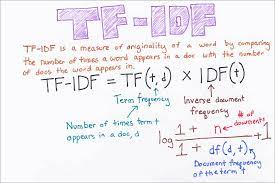

In [18]:
for index,articulo in temp.iterrows():
  for i in range(len(articulo)):
    Mzero.at[index,columnas[i]]=temp1.at[index,columnas[i]]*np.log10((1+nd)/(1+ranking_words.loc[index,'f_documentos']))

In [19]:
Mzero.to_pickle("MZero.pickle")

In [20]:
Mzero

doc_id,1883698,1883688,1886956,1894710,1892350,1891869,1894679,1887686,1885932,1891788,...,1890357,1874856,1889492,1884647,1879246,1877599,1899206,1885451,1880301,1890943
word,,,,,,,,,,,,,,,,,,,,,
san,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.725568,0.0,0.000000,...,0.000000,0.000000,0.000000,2.176703,0.000000,0.000000,0.000000,0.000000,0.0,0.0
años,0.0,0.682102,0.0,0.000000,0.682102,0.000000,14.324144,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.046306,0.0,0.0
enlaces,0.0,0.000000,0.0,0.271928,0.000000,0.000000,0.271928,0.000000,0.0,0.271928,...,0.271928,0.271928,0.271928,0.000000,0.000000,0.271928,0.000000,0.271928,0.0,0.0
parte,0.0,1.178696,0.0,0.000000,0.000000,1.178696,0.000000,0.000000,0.0,0.589348,...,0.000000,0.589348,0.000000,0.589348,0.000000,0.000000,0.589348,2.357392,0.0,0.0
externos,0.0,0.000000,0.0,0.271928,0.000000,0.000000,0.271928,0.000000,0.0,0.271928,...,0.271928,0.271928,0.271928,0.000000,0.000000,0.271928,0.000000,0.271928,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eliminaran,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.703291,0.0,0.0
places,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
musical,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.703291,0.000000,0.000000,0.000000,0.0,0.0


## Descomposición de valores singulares

## Primer paso : Aproximación de mínimos cuadrados

La proyección SVD es calculada por descomponsición la matriz de representaciones de documentos. (40 documents, vocabulary of N terms)
$M_{N×40}$ en el producto de tres matrices, $ U_{N×d}, Sigma_{d×d}$, y $(V_{40×d})^{T}$ ,con $d = min(N,40) = 40 $ :  $$M_{N×40} = U_{N×40}.Sigma_{40×40}.(V_{40×N})^{T}$$

- Las matrices U y V representan términos y documentos en este nuevo espacio. Por ejemplo, la primera columna de U corresponde a la primera fila de M, y la primera columna de V corresponde a la primera columna de M.
- La matriz diagonal Sigma contiene los valores singulares de M en orden descendente

In [21]:
from numpy import array
from scipy.linalg import svd

In [22]:
? svd # doc of svd()

Object ` svd # doc of svd()` not found.


In [23]:
U, s, VT = svd(Mzero)
d = min(Mzero.shape[0], Mzero.shape[1])
Sigma = np.zeros((d,d))
Sigma[:Mzero.shape[0], :Mzero.shape[0]] = np.diag(s)

In [24]:
print('\nU :\n', U.round(2))
print('\nSigma :\n',Sigma.round(2))
print('\nVT :\n',VT.round(2))


U :
 [[-0.01  0.02 -0.   ...  0.    0.    0.  ]
 [-0.    0.04 -0.03 ... -0.   -0.    0.  ]
 [-0.01  0.   -0.   ...  0.    0.    0.  ]
 ...
 [-0.    0.   -0.   ...  1.    0.    0.  ]
 [-0.    0.   -0.   ... -0.    1.    0.  ]
 [-0.    0.   -0.   ...  0.    0.    1.  ]]

Sigma :
 [[176.17   0.     0.   ...   0.     0.     0.  ]
 [  0.    94.83   0.   ...   0.     0.     0.  ]
 [  0.     0.    94.25 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...   2.98   0.     0.  ]
 [  0.     0.     0.   ...   0.     2.41   0.  ]
 [  0.     0.     0.   ...   0.     0.     2.41]]

VT :
 [[-0.   -0.02 -0.   ... -0.01 -0.   -0.01]
 [ 0.    0.09  0.   ...  0.01  0.    0.02]
 [-0.   -0.07 -0.   ... -0.01 -0.   -0.01]
 ...
 [ 0.   -0.   -0.   ...  0.   -0.   -0.  ]
 [ 0.   -0.    0.   ... -0.    0.   -0.  ]
 [ 0.    0.    0.   ...  0.   -0.    0.  ]]


## Segundo paso : restringir el número de dimensiones

Restringiendo las matrices U, Sigma y VT a sus primeras k < n filas se obtienen las matrices $ U_{N×k}, Sigma_{k×k}$, y $VT_{k×40}$

#SVD usado para reducir dimensionalidad

**FIGURE 2** : La matriz de documentos despues de rescalar y reducir a dos dimensiones.

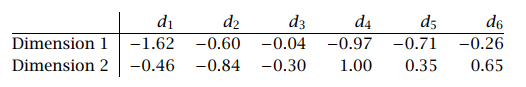

In [25]:
# seleccionar el número de documentos
n_elements = 2
Sigma = Sigma[:n_elements, :n_elements]
VT = VT[:n_elements, :]
U = U[:, :n_elements]
# by the way, we can also reconstruct A
Mreconstructed = U.dot(Sigma.dot(VT))
print('M :\n', Mreconstructed.round(3))

M :
 [[0.011 0.187 0.003 ... 0.037 0.007 0.047]
 [0.014 0.3   0.005 ... 0.046 0.012 0.058]
 [0.003 0.042 0.001 ... 0.01  0.002 0.013]
 ...
 [0.    0.001 0.    ... 0.    0.    0.   ]
 [0.002 0.039 0.001 ... 0.006 0.002 0.008]
 [0.    0.004 0.    ... 0.001 0.    0.001]]


## Tercer paso : reescalando con valores singulares
EL objetivo es obtener la matriz con dimensión redicida $ B = Sigmak_{k×k}.VT_{k×40} $ de documentos, con valores singulares y reducción a dos dimensiones.

In [26]:
# transform
B = Sigma.dot(VT)[:n_elements,:]
print('\nB = \n', B.round(2))


B = 
 [[-3.300e-01 -2.710e+00 -4.000e-02 -7.000e-01 -2.100e-01 -9.000e-01
  -2.740e+00 -8.900e-01 -3.800e-01 -8.400e-01 -8.000e-02 -4.000e-02
  -1.100e-01 -2.300e-01 -2.000e-02 -8.300e-01 -4.000e-02 -3.100e-01
  -9.000e-02 -1.300e-01 -7.000e-02 -4.000e-02 -1.000e-01 -8.000e-01
  -4.000e-02 -0.000e+00 -1.100e-01 -6.300e-01 -4.000e-02 -3.000e-01
  -1.100e-01 -7.300e-01 -2.600e-01 -6.000e-02 -6.000e-01 -2.000e-02
  -2.860e+00 -1.740e+00 -4.000e-01 -2.860e+00 -1.900e-01 -4.600e-01
  -6.100e-01 -9.000e-02 -1.700e-01 -7.300e-01 -7.000e-02 -6.220e+00
  -1.100e-01 -4.520e+00 -3.600e-01 -1.200e-01 -1.200e-01 -2.600e-01
  -4.000e-02 -8.000e-01 -6.040e+00 -2.100e-01 -7.000e-02 -4.000e-02
  -3.300e-01 -4.700e-01 -2.400e-01 -4.000e-02 -1.500e-01 -2.060e+00
  -7.900e-01 -2.300e-01 -3.000e-02 -6.040e+00 -9.000e-02 -7.100e-01
  -9.300e-01 -4.000e-02 -6.900e-01 -1.070e+00 -9.000e-02 -2.000e-02
  -1.756e+02 -1.170e+00 -4.100e-01 -2.700e-01 -1.100e-01 -1.800e-01
  -2.200e-01 -2.230e+00 -1.900e-01 -1.200

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

%matplotlib inline

for k in range(len(B[0])):
  x=B[0][k]
  y=B[1][k]
  B[0][k]= x/np.sqrt((x**2+y**2))
  B[1][k]= y/np.sqrt((x**2+y**2))

x = B[0]
y = B[1]
labels = np.arange(0,len(x))

fig = px.scatter(x=x, y=y, text=labels)
fig.update_traces(textposition='top center')
fig.show()


In [28]:
train.at[17,'Texto']

'salvatore tory belleci monterey octubre cineasta modelista mejor conocido trabajo programa mythbusters discovery channel trabajado industrial light magic películas amenaza fantasma ataque clones cruceros federación podracers star wars parte piezas creadas estudió san francisco state university tory trabajó películas trilogía matrix van helsing peter pan héroes órbita hombre bicentenario considerado temerario compañeros programa kari byron and grant imahara menudo ejecuta acrobacias peligrosas momento poner prueba mito encontramos aquel plantea toros provocados usando banderas color rojo mito afirma lengua humana pega inmediatamente poste mismo congelado resultado frecuentemente encuentra envuelto situaciones cómicas mientrás prueba mitos aunque ninguna lesión permanente momento enlaces externos web tory belleci'

In [29]:
train.at[55,'Texto']

'escudo armas preciosa alhaja corona convertida ciudad bajo nombre villa oropesa reyes españa dieron privilegio armas doto escudo cuyo interior destaca cerro cuya cima globo cruz composición rodeada mensaje escrito latín feriam totum sic huancavelica tuetur cuyo significado sacrificaré huancavelica segura pérdida esplendor económico social obstáculo hijos abrazaran fervorosamente causa libertad gesto viril decidido levantaron armas autoridades españolas apoyando revolución pumacahua referencias véase huancavelica escudo heráldica'

#PCA (Principal Component Analysis)

In [30]:
from sklearn import decomposition

In [31]:
pca=decomposition.PCA(n_components=40)
pc=pca.fit_transform(Mzero)

In [32]:
df=pd.DataFrame({'var':pca.explained_variance_ratio_})

<Axes: ylabel='var'>

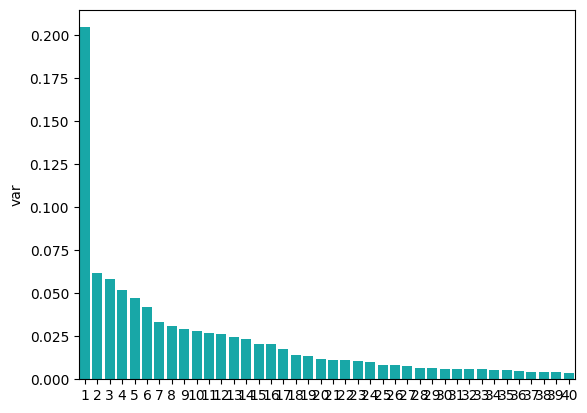

In [33]:
import seaborn as sns
sns.barplot(x=list(range(1,40+1)),y='var',data=df,color='c')

In [34]:
pc

array([[ 1.79840619,  0.73176315, -0.31245367, ...,  0.14726592,
        -0.04524438,  0.04533323],
       [-0.37719062, -0.41344823,  1.62622203, ..., -0.00966167,
         0.42107371, -0.05822762],
       [ 0.67184916, -0.08128214,  0.06109962, ...,  0.17129979,
         0.2495399 ,  0.01767543],
       ...,
       [-0.41526313, -0.02060756, -0.19983706, ..., -0.01225868,
        -0.0185569 , -0.00859298],
       [-0.40001162, -0.0636157 , -0.1993593 , ..., -0.01108383,
        -0.01894335, -0.00723459],
       [-0.40927877, -0.02278011, -0.19529486, ..., -0.0056804 ,
        -0.02558954, -0.00803122]])

In [35]:
%matplotlib inline

for k in range(len(pc[0])):
  x=pc[0][k]
  y=pc[1][k]
  pc[0][k]= x/np.sqrt((x**2+y**2))
  pc[1][k]= y/np.sqrt((x**2+y**2))

x = pc[0]
y = pc[1]
labels = np.arange(0,len(x))

fig = px.scatter(x=x, y=y, text=labels)
fig.update_traces(textposition='top center')
fig.show()

In [36]:
train.at[5,'Texto']

'tratado madrid acuerdo paz mediante españa inglaterra ponían fin guerra ambos países mantenían tratado incluía restablecimiento relaciones comerciales ambos países tratado delegaciones tras conversaciones preliminares mantenidas contaron intermediación carlos manuel saboya oficios carlos coloma embajada española londres tratado definitivo firmó noviembre madrid presencia gaspar guzmán íñigo vélez guevara pedro zúñiga representación felipe españa francis cottington enviado carlos inglaterra acuerdos principales puntos acordados tratado cese hostilidades olvido daños ofensas revocación patentes corso otorgadas guerra negación ayuda comercio enemigos parte contraria ninguno firmantes formaría alianzas perjuicio parte restablecimiento relaciones comerciales según términos acordados tratado londres navíos españoles libre entrada puertos ingleses recíprocamente ingleses podrían entrar puertos españoles súbditos cada países firmantes recibirían país mismo trato nativos inglaterra interrumpir

In [37]:
train.at[10,'Texto']

'odriozola apellido origen vasco puede referirse siguientes personas jacobo odriozola jugador baloncesto jon odriozola exciclista director ciclista josé maría odriozola presidente federación española atletismo miguel odriozola catedrático zootecnia mikel odriozola domínguez atleta especialista marcha atlética ricardo odriozola violinista compositor'

# brown


In [38]:
import nltk
import matplotlib as plt
import pandas as pd
import math
from nltk.corpus import brown
import numpy as np
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [39]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [40]:
brown.docs()[:10]

AttributeError: ignored

In [43]:
brown.paras(categories='reviews')[:10]

[[['It',
   'is',
   'not',
   'news',
   'that',
   'Nathan',
   'Milstein',
   'is',
   'a',
   'wizard',
   'of',
   'the',
   'violin',
   '.'],
  ['Certainly',
   'not',
   'in',
   'Orchestra',
   'Hall',
   'where',
   'he',
   'has',
   'played',
   'countless',
   'recitals',
   ',',
   'and',
   'where',
   'Thursday',
   'night',
   'he',
   'celebrated',
   'his',
   '20th',
   'season',
   'with',
   'the',
   'Chicago',
   'Symphony',
   'Orchestra',
   ',',
   'playing',
   'the',
   'Brahms',
   'Concerto',
   'with',
   'his',
   'own',
   'slashing',
   ',',
   'demon-ridden',
   'cadenza',
   'melting',
   'into',
   'the',
   'high',
   ',',
   'pale',
   ',',
   'pure',
   'and',
   'lovely',
   'song',
   'with',
   'which',
   'a',
   'violinist',
   'unlocks',
   'the',
   'heart',
   'of',
   'the',
   'music',
   ',',
   'or',
   'forever',
   'finds',
   'it',
   'closed',
   '.']],
 [['There',
   'was',
   'about',
   'that',
   'song',
   'something',
   'i

In [ ]:
brown.sents()[:10]